<img src="image/Capa.png" alt="ebac-logo">

---

# **Brescia** | Python: DataSet Global Peace Index 2023 

Caderno de **Códigos**<br> 
Desenvolvedor [Enzo Schitini](https://enzo-schitini.bubbleapps.io/version-test/)

---

## -> `Definition`

### `About the function of the program`

Hello, my name is `Enzo Schtini` and I want to share `Imola` with you. It's an algorithm that reveals incredible data about 'exoplanets and the temperature of stars.'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from functools import reduce

from adige import valore_abbreviato
from adige import ArquivoCSV

index_csv = './index.csv'

### `1° Exploratory analysis`

##### Context

...

| Coluna  | Descrição |
| ------- | --------- |
| Country      | Nome do pais |
| iso3c | Nome abreviado |
| year   | --- |
| Overall Scores    | Pontuação geral |
| Safety and Security | Segurança e proteção |
| Ongoing Conflict | Conflito contínuo |
| Militarian | Militar |

In [3]:
df = pd.read_csv(index_csv, na_values='na')

struttura = df.shape
struttura = str(struttura).replace('(', '').replace(')', '')
struttura = str(struttura).strip().split(sep=',')
print(f'Data information: {valore_abbreviato(struttura[0])} lines and {valore_abbreviato(struttura[1])} columns.')

Data information: 2.593 lines and 13 columns.


In [4]:
df.dtypes

Country                 object
iso3c                   object
year                     int64
Overall Scores         float64
Safety and Security    float64
Ongoing Conflict       float64
MilitarianAlbania      float64
ALB                    float64
2008                   float64
1.791                  float64
2.236                  float64
1.247                  float64
1.776                  float64
dtype: object

 - Atributes **categorical**.

In [5]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Country,2593,163,United Arab Emirates,16
iso3c,2593,163,ARE,16


 - Atributes **numeric**.

In [6]:
df.drop('Country', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2593.0,2015.530274,4.603486,2008.000,2012.000,2016.000,2020.000,2023.000
Overall Scores,2593.0,2.017454,0.443238,1.081,1.727,1.974,2.231,3.588
Safety and Security,2593.0,2.343771,0.566121,1.178,2.004,2.357,2.674,4.177
Ongoing Conflict,2593.0,1.714017,0.567966,1.000,1.403,1.604,2.006,3.828
MilitarianAlbania,2593.0,1.891795,0.406097,1.012,1.643,1.833,2.078,4.108
ALB,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.791,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.236,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.247,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Missing data

In [7]:
df.isna().any()

Country                False
iso3c                  False
year                   False
Overall Scores         False
Safety and Security    False
Ongoing Conflict       False
MilitarianAlbania      False
ALB                     True
2008                    True
1.791                   True
2.236                   True
1.247                   True
1.776                   True
dtype: bool

 - The function below generates some statistics on the missing data columns.

In [8]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantity': qtd, "percentage": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [9]:
stats_dados_faltantes(df=df)

{'ALB': {'quantity': 2593, 'percentage': 100.0}}
{'2008': {'quantity': 2593, 'percentage': 100.0}}
{'1.791': {'quantity': 2593, 'percentage': 100.0}}
{'2.236': {'quantity': 2593, 'percentage': 100.0}}
{'1.247': {'quantity': 2593, 'percentage': 100.0}}
{'1.776': {'quantity': 2593, 'percentage': 100.0}}


### `2° Data cleansing`

In [10]:
from adige import ArquivoCSV
csv = ArquivoCSV('./index.csv')
csv = csv.extrair_coluna(0)
print(f'Numero iniziale: {len(csv)}')

def pulizia(archivio):
    file = []
    with open(file=archivio, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line_sep = line.split(sep=',')
            if line_sep[3] != '':
                file.append(line)
                line = fp.readline()
            else:
                line = fp.readline()
    from adige import limp_csv
    limp_csv(archivio)

    with open(file=archivio, mode='a', encoding='utf-8') as fp:
        fp.write('Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian')
        for x in file:
            fp.write(x)

pulizia('./index.csv')
csv = ArquivoCSV('./index.csv')
csv = csv.extrair_coluna(0)
print(f'Numero finale: {len(csv)}')

Numero iniziale: 2593
Numero finale: 2592


### `3° Data visualization`

In [11]:
def cattegorie(file, colonna:int):
    csv = ArquivoCSV(file)
    lista = list(set(csv.extrair_coluna(colonna)))
    return list(filter(None, lista))

In [12]:
print(f'I dati vanno dal {min(cattegorie(index_csv, 2))} fino a {max(cattegorie(index_csv, 2))}, tutto sommato: {len(cattegorie(index_csv, 2))} anni di analise.')

I dati vanno dal 2008 fino a 2023, tutto sommato: 16 anni di analise.


##### Dati dei paesi

In [13]:
paese_nome = 'Italy'

In [14]:
def trovare_paese(paese:str) -> list:
    paesi = []
    with open(file=index_csv, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line = line.strip()
            line_x = line.split(sep=',')
            if line_x[0] == paese:
                paesi.append(line)
                line = fp.readline()
            else:
                line = fp.readline()
    return paesi

print(trovare_paese(paese_nome))
print(len(trovare_paese(paese_nome)))
trovare_paese(paese_nome)[0]

['Italy,ITA,2008,1.588,1.752,1.073,2.041', 'Italy,ITA,2009,1.673,1.948,1.08,2.033', 'Italy,ITA,2010,1.636,1.852,1.083,2.045', 'Italy,ITA,2011,1.655,1.932,1.073,1.996', 'Italy,ITA,2012,1.677,1.961,1.057,2.059', 'Italy,ITA,2013,1.703,2.028,1.057,2.045', 'Italy,ITA,2014,1.667,1.954,1.057,2.031', 'Italy,ITA,2015,1.668,2.014,1.062,1.919', 'Italy,ITA,2016,1.662,1.994,1.067,1.924', 'Italy,ITA,2017,1.649,1.973,1.064,1.913', 'Italy,ITA,2018,1.701,2.095,1.057,1.922', 'Italy,ITA,2019,1.676,2.018,1.055,1.96', 'Italy,ITA,2020,1.63,1.945,1.048,1.909', 'Italy,ITA,2021,1.65,1.969,1.041,1.957', 'Italy,ITA,2022,1.642,1.924,1.041,2.003', 'Italy,ITA,2023,1.662,1.93,1.046,2.07']
16


'Italy,ITA,2008,1.588,1.752,1.073,2.041'

In [15]:
def calcoli_paese(paesi:list):

    overall_scores = []
    safety_security = []
    ongoing_conflict = []
    militarian = []

    for x in paesi:
        x = str(x)
        x_sep = x.split(sep=',')
        overall_scores.append((x_sep)[3])
        safety_security.append((x_sep)[4])
        ongoing_conflict.append((x_sep)[5])
        militarian.append((x_sep)[6])
    
    return overall_scores, safety_security, ongoing_conflict, militarian

overall_scores = calcoli_paese(trovare_paese(paese_nome))[0]
print(overall_scores)

['1.588', '1.673', '1.636', '1.655', '1.677', '1.703', '1.667', '1.668', '1.662', '1.649', '1.701', '1.676', '1.63', '1.65', '1.642', '1.662']


[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[3.372, 3.373, 3.326, 3.083, 3.031, 2.917, 2.933, 3.158, 3.368, 3.314, 3.225, 3.18, 3.118, 3.138, 3.028, 3.006]
Le medie di Italy sono: 
Pontuação geral: 3.16 
Segurança e proteção: 3.82 
Conflito contínuo: 2.94  
Militar: 2.39.


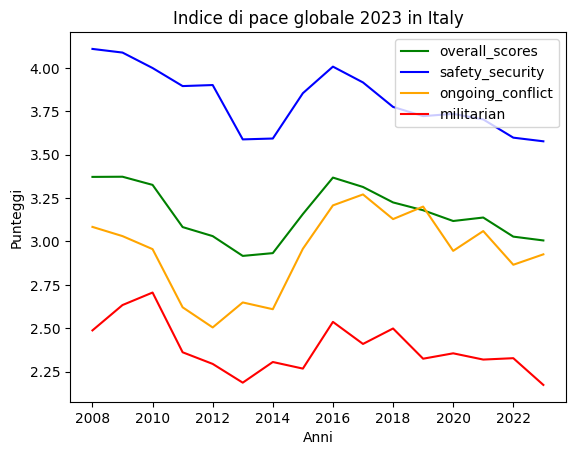

['Italy', 3.16, 3.82, 2.94, 2.39]

In [16]:
def grafico_paese(paese:str):
    # Gli anni
    anni = list(map(int, cattegorie(index_csv, 2)))
    anni.sort()
    print(anni) 
    # Dati prelevati
    overall_scores = list(map(float, calcoli_paese(trovare_paese(paese))[0]))
    safety_security = list(map(float, calcoli_paese(trovare_paese(paese))[1]))
    ongoing_conflict = list(map(float, calcoli_paese(trovare_paese(paese))[2]))
    militarian = list(map(float, calcoli_paese(trovare_paese(paese))[3]))
    print(overall_scores)
    # Le medie
    overall_scores_media = round(reduce(lambda x, y: x + y, overall_scores) / len(anni), 2)
    safety_security_media = round(reduce(lambda x, y: x + y, safety_security) / len(anni), 2)
    ongoing_conflict_media = round(reduce(lambda x, y: x + y, ongoing_conflict) / len(anni), 2)
    militarian_media = round(reduce(lambda x, y: x + y, militarian) / len(anni), 2)
    medie = [paese_nome, overall_scores_media, safety_security_media, ongoing_conflict_media, militarian_media]
    print(f'Le medie di {paese_nome} sono: \nPontuação geral: {overall_scores_media} \nSegurança e proteção: {safety_security_media} \nConflito contínuo: {ongoing_conflict_media}  \nMilitar: {militarian_media}.')
    # Grafico
    x  = anni
    y1 = overall_scores
    y2 = safety_security
    y3 = ongoing_conflict
    y4 = militarian
    plt.title(f'Indice di pace globale 2023 in {paese_nome}')
    plt.plot(x, y1, color = "green", label="overall_scores")
    plt.plot(x, y2, color = "blue", label="safety_security")
    plt.plot(x, y3, color = "orange", label="ongoing_conflict")
    plt.plot(x, y4, color = "red", label="militarian")
    plt.xlabel("Anni")
    plt.ylabel("Punteggi")
    plt.savefig('Grafico')
    plt.legend()
    plt.show()

    return medie

grafico_paese('Iraq')

##### Dati globali

In [17]:
# Gruppetto dei cinque

data = trovare_paese(paese_nome)
print(data)

# Ordina i dati in base alla temperatura (dal più alto al più basso)
data.sort(key=lambda x: float(x.split(',')[3]), reverse=True)
print(data)

def smistando(data:list):
   ordem = 0
   print(' \n ')
   print('--------------------------')
   for x in data:
      x = x.strip().split(sep=',')
      ordem = ordem + 1
      print(f'{ordem}° {x[0]} - {x[3]}  --> Overall Scores {x[2]}')
   print('--------------------------')
smistando(data)

['Italy,ITA,2008,1.588,1.752,1.073,2.041', 'Italy,ITA,2009,1.673,1.948,1.08,2.033', 'Italy,ITA,2010,1.636,1.852,1.083,2.045', 'Italy,ITA,2011,1.655,1.932,1.073,1.996', 'Italy,ITA,2012,1.677,1.961,1.057,2.059', 'Italy,ITA,2013,1.703,2.028,1.057,2.045', 'Italy,ITA,2014,1.667,1.954,1.057,2.031', 'Italy,ITA,2015,1.668,2.014,1.062,1.919', 'Italy,ITA,2016,1.662,1.994,1.067,1.924', 'Italy,ITA,2017,1.649,1.973,1.064,1.913', 'Italy,ITA,2018,1.701,2.095,1.057,1.922', 'Italy,ITA,2019,1.676,2.018,1.055,1.96', 'Italy,ITA,2020,1.63,1.945,1.048,1.909', 'Italy,ITA,2021,1.65,1.969,1.041,1.957', 'Italy,ITA,2022,1.642,1.924,1.041,2.003', 'Italy,ITA,2023,1.662,1.93,1.046,2.07']
['Italy,ITA,2013,1.703,2.028,1.057,2.045', 'Italy,ITA,2018,1.701,2.095,1.057,1.922', 'Italy,ITA,2012,1.677,1.961,1.057,2.059', 'Italy,ITA,2019,1.676,2.018,1.055,1.96', 'Italy,ITA,2009,1.673,1.948,1.08,2.033', 'Italy,ITA,2015,1.668,2.014,1.062,1.919', 'Italy,ITA,2014,1.667,1.954,1.057,2.031', 'Italy,ITA,2016,1.662,1.994,1.067,1.924'

In [18]:
def media_globale_anno():
    anni = cattegorie(index_csv, 2)
    scores = []
    for anno in anni:
        with open(file=index_csv, mode='r', encoding='utf-8') as fp:
            line = fp.readline()
            line = fp.readline()
            while line:
                line_x = line.strip().split(sep=',')
                if line_x[2] == anno:
                    scores.append(line_x[3])
                    line = fp.readline()
                else:
                    line = fp.readline()
    
    scores = list(filter(None, scores))
    print(scores)
    scores = list(map(float, scores))
    media = round(reduce(lambda x, y: x + y, scores) / float(len(scores)), 2)
    print(media)

media_globale_anno()

['3.126', '2.048', '1.794', '1.642', '1.879', '2.143', '1.432', '1.396', '2.225', '2.247', '1.482', '2.123', '1.751', '2.054', '1.607', '2.139', '1.773', '2.101', '1.942', '2.005', '1.851', '1.842', '2.65', '1.38', '1.435', '1.722', '2.167', '2.356', '2.027', '2.796', '2.066', '2.598', '1.781', '2.041', '1.898', '1.4', '1.55', '1.998', '1.26', '2.094', '2.415', '2.063', '2.184', '2.438', '1.665', '1.664', '2.31', '1.373', '1.682', '2.049', '1.741', '2.525', '1.729', '2.266', '1.927', '2.242', '1.945', '1.97', '2.159', '2.08', '2.232', '1.612', '2.026', '1.533', '1.687', '2.404', '1.472', '2.528', '3.083', '1.14', '2.697', '1.655', '2.041', '1.86', '1.38', '2.073', '2.395', '2.275', '2.073', '1.885', '1.975', '1.524', '1.737', '2.336', '1.992', '2.654', '2.529', '1.875', '1.795', '1.725', '2.036', '1.997', '1.998', '2.326', '1.837', '2.153', '2.111', '2.035', '1.846', '1.961', '2.246', '1.619', '1.704', '1.531', '1.989', '1.985', '2.346', '1.865', '1.528', '1.442', '2.089', '1.325', '1.